In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

<a id = 'Index:'></a>

# Table of Content

In this notebook you will apply xxxxxxx


- [Part 1](#part1)- Load the data
- [Part 2](#part2)- Hierarchical clustering


[Back to top](#Index:) 

<a id='part1'></a>

### Part 1 - Load the data

Load the data and explore the datasets

In [2]:
# Replace 'your_data.csv' with the path to your data file
df = pd.read_csv('data/fraud_dataset_example.csv')

##Identify the Features and Their Types:
Use .info() to get a concise summary of the DataFrame, including the column names, non-null counts, and data types.

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
print(f'The Data consist:\n Total Rows: {df.shape[0]}\n Total columns: {df.shape[1]}')

The Data consist:
 Total Rows: 101613
 Total columns: 11


In [5]:
print(f'Total missing value in Percentage: \n {round(df.isnull().sum()/df.shape[0],2)}')

Total missing value in Percentage: 
 step              0.0
type              0.0
amount            0.0
nameOrig          0.0
oldbalanceOrg     0.0
newbalanceOrig    0.0
nameDest          0.0
oldbalanceDest    0.0
newbalanceDest    0.0
isFraud           0.0
isFlaggedFraud    0.0
dtype: float64


In [6]:
#missing value replacement using random samples imputer
def impute_nan(df,variable):
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable]=random_sample

In [7]:
#clear view of data

# Create an empty list to store the summary information
list_item = []

# Iterate over each column in the DataFrame
for col in df.columns:
    # Append the column name, data type, number of nulls, percentage of nulls, and unique value counts to the list
    list_item.append([col, df[col].dtype, df[col].isnull().sum(), (df[col].isnull().sum()/df.shape[0]), len(df[col].unique()), df[col].unique()[:4]])

# Create a DataFrame from the list with specified column names
des_df = pd.DataFrame(data=list_item, columns=['Feature', 'data_type', 'Null_number', 'Null_pct', 'Unique_counts', 'unique_value'])

# Display the summary DataFrame
des_df


,Feature,data_type,Null_number,Null_pct,Unique_counts,unique_value
0,step,int64,0,0.0,10,"[1, 2, 3, 4]"
1,type,object,0,0.0,5,"[PAYMENT, TRANSFER, CASH_OUT, DEBIT]"
2,amount,float64,0,0.0,101069,"[9839.64, 1864.28, 181.0, 11668.14]"
3,nameOrig,object,0,0.0,101613,"[C1231006815, C1666544295, C1305486145, C84008..."
4,oldbalanceOrg,float64,0,0.0,59037,"[170136.0, 21249.0, 181.0, 41554.0]"
5,newbalanceOrig,float64,0,0.0,49018,"[160296.36, 19384.72, 0.0, 29885.86]"
6,nameDest,object,0,0.0,52280,"[M1979787155, M2044282225, C553264065, C38997010]"
7,oldbalanceDest,float64,0,0.0,54585,"[0.0, 21182.0, 41898.0, 10845.0]"
8,newbalanceDest,float64,0,0.0,19741,"[0.0, 40348.79, 157982.12, 51513.44]"
9,isFraud,int64,0,0.0,2,"[0, 1]"


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,101613.0,8.523457e+00,1.820681e+00,1.00,8.00,9.00,10.00,10.00
amount,101613.0,1.740901e+05,3.450199e+05,0.32,10016.59,53385.41,212498.40,10000000.00
oldbalanceOrg,101613.0,9.071753e+05,2.829575e+06,0.00,0.00,20190.47,194715.00,38939424.03
newbalanceOrig,101613.0,9.234992e+05,2.867319e+06,0.00,0.00,0.00,219217.76,38946233.02
oldbalanceDest,101613.0,8.810428e+05,2.399949e+06,0.00,0.00,21058.00,591921.70,34008736.98
newbalanceDest,101613.0,1.183998e+06,2.797761e+06,0.00,0.00,51783.43,1063121.64,38946233.02
isFraud,101613.0,1.141586e-03,3.376824e-02,0.00,0.00,0.00,0.00,1.00
isFlaggedFraud,101613.0,0.000000e+00,0.000000e+00,0.00,0.00,0.00,0.00,0.00


In [9]:
print(f"Percentage of fraud to total samples: {round((df[df['isFraud'] == 1].shape[0] / df.shape[0]) * 100, 2)}%")
print(f"\nPercentage of fraud flagged to total samples: {round((df[df['isFlaggedFraud'] == 1].shape[0] / df.shape[0]) * 100, 2)}%")


Percentage of fraud to total samples: 0.11%

Percentage of fraud flagged to total samples: 0.0%


In [10]:
# Perform a Descriptive Statistical Summary:
#Use .describe() to generate descriptive statistics that summarize the central tendency, dispersion, and shape of the dataset’s distribution, excluding NaN values.
summary_stats=df.describe(include='all')  # include='all' will also summarize categorical data
print(summary_stats)

                 step     type        amount     nameOrig  oldbalanceOrg  \
count   101613.000000   101613  1.016130e+05       101613   1.016130e+05   
unique            NaN        5           NaN       101613            NaN   
top               NaN  PAYMENT           NaN  C1231006815            NaN   
freq              NaN    40062           NaN            1            NaN   
mean         8.523457      NaN  1.740901e+05          NaN   9.071753e+05   
std          1.820681      NaN  3.450199e+05          NaN   2.829575e+06   
min          1.000000      NaN  3.200000e-01          NaN   0.000000e+00   
25%          8.000000      NaN  1.001659e+04          NaN   0.000000e+00   
50%          9.000000      NaN  5.338541e+04          NaN   2.019047e+04   
75%         10.000000      NaN  2.124984e+05          NaN   1.947150e+05   
max         10.000000      NaN  1.000000e+07          NaN   3.893942e+07   

        newbalanceOrig    nameDest  oldbalanceDest  newbalanceDest  \
count     1.01613

In [11]:
#Identify Skewness:
#Check the skewness of the distribution of numerical data. A skewness value closer to 0 indicates a more symmetric distribution, while a value far from 0 indicates a skewed distribution.
numeric_cols = df.select_dtypes(include=[np.number])
skewness = numeric_cols.skew()
# A skewness value:
#Closer to 0 indicates a more symmetric distribution; 
#Greater than 0 indicates a right-skewed (or positively skewed) distribution.
#Less than 0 indicates a left-skewed (or negatively skewed) distribution.

print(skewness)
print(numeric_cols)


step              -2.553444
amount             5.425476
oldbalanceOrg      5.295054
newbalanceOrig     5.223139
oldbalanceDest     5.059426
newbalanceDest     4.322121
isFraud           29.546591
isFlaggedFraud     0.000000
dtype: float64
        step      amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0          1     9839.64      170136.00       160296.36            0.00   
1          1     1864.28       21249.00        19384.72            0.00   
2          1      181.00         181.00            0.00            0.00   
3          1      181.00         181.00            0.00        21182.00   
4          1    11668.14       41554.00        29885.86            0.00   
...      ...         ...            ...             ...             ...   
101608    10     7477.02         785.00            0.00            0.00   
101609    10   282252.35      220339.29            0.00        95156.01   
101610    10    17289.01           0.00            0.00            0.00   
101611    1

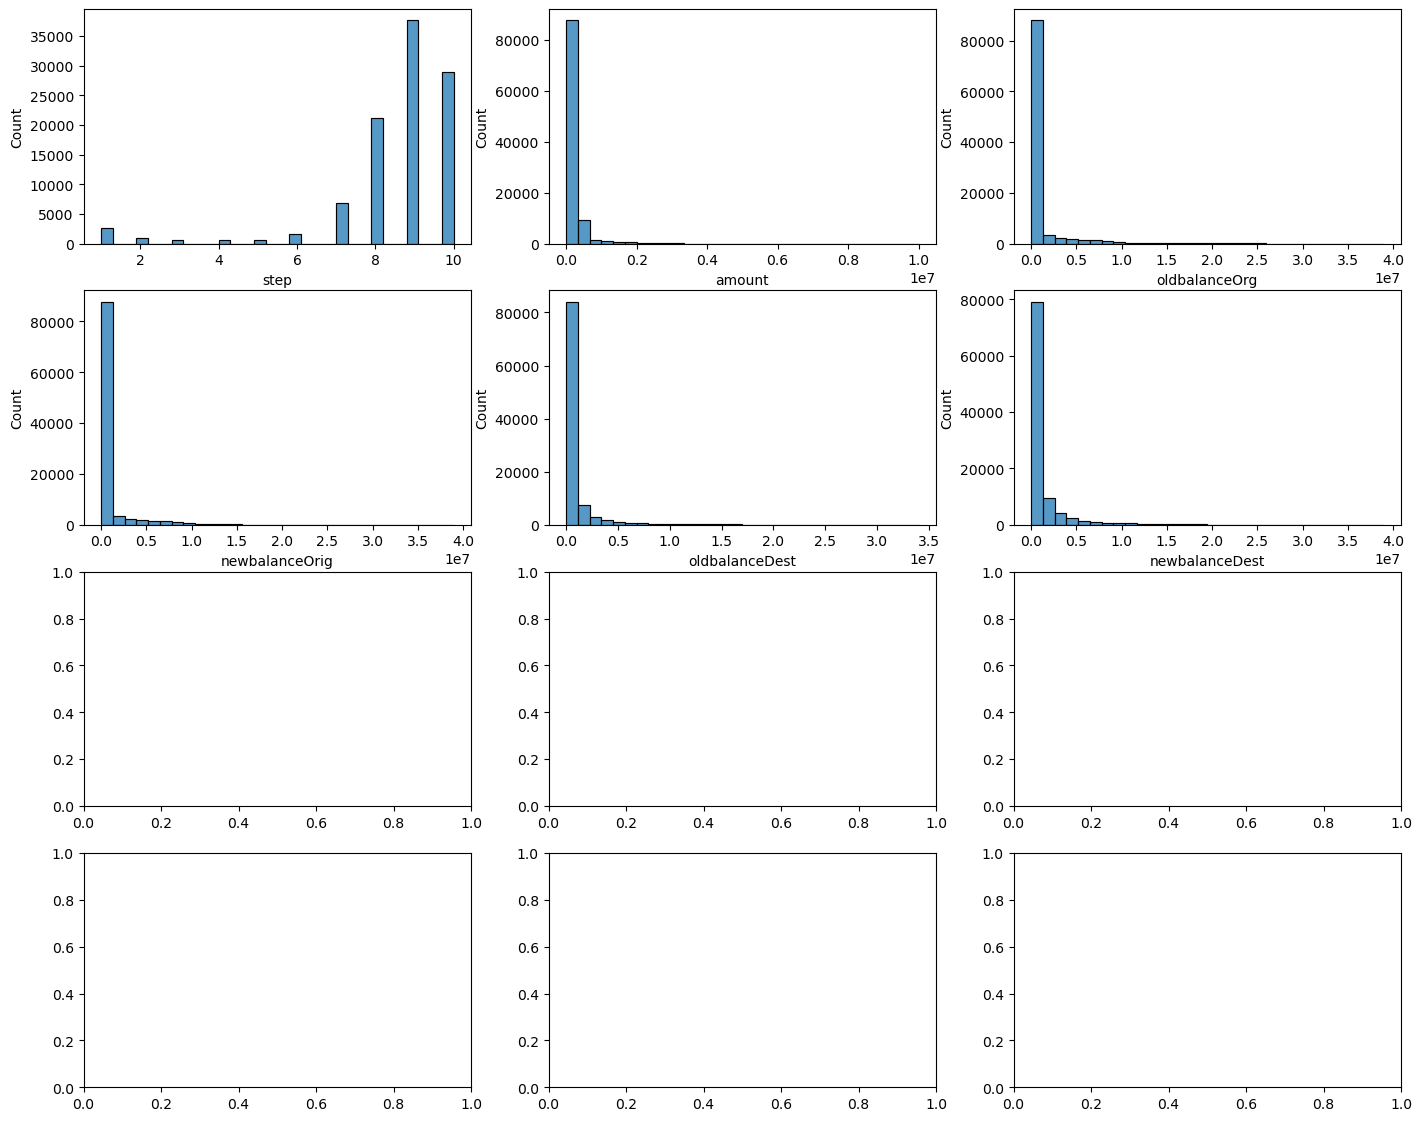

In [12]:
# List of numerical variables to visualize
num1 = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
        'oldbalanceDest', 'newbalanceDest']

# Set up a grid of plots with 4 rows and 3 columns
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(17, 14))

# Flatten the array of axes to make it easier to iterate over
axs = axs.flatten()

# Loop through the list of variables and create a histogram for each
for i, var in enumerate(num1):
    sns.histplot(x=var, data=df, ax=axs[i], bins=30)

# Display the plots
plt.show()


step:


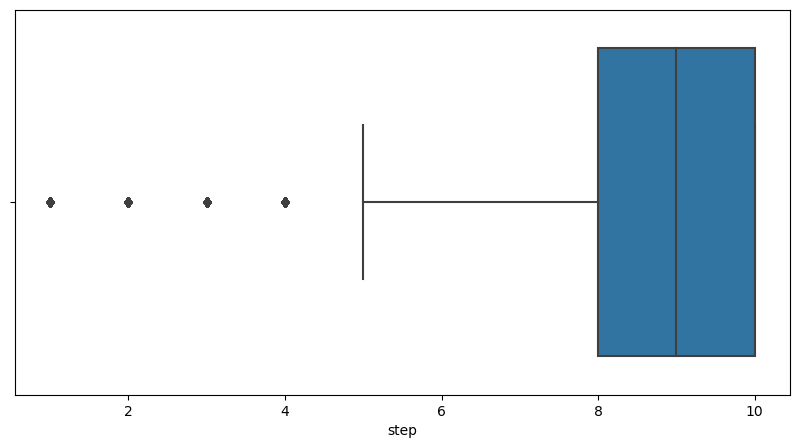

amount:


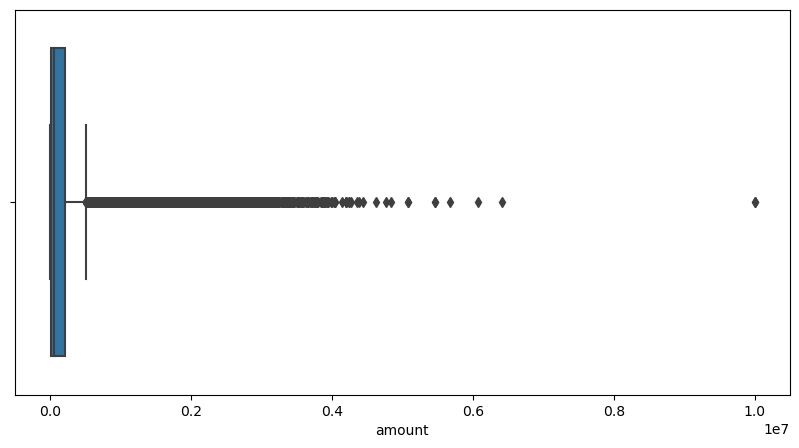

oldbalanceOrg:


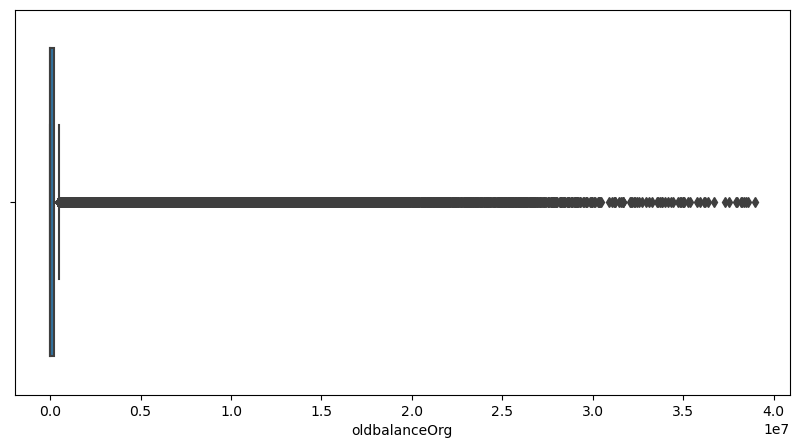

newbalanceOrig:


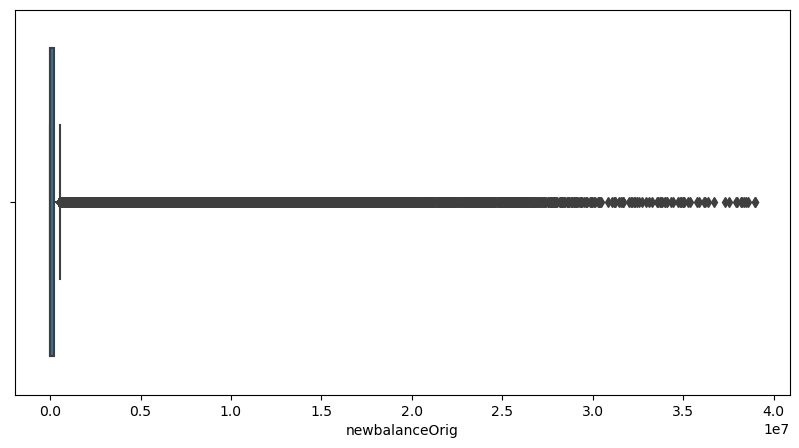

oldbalanceDest:


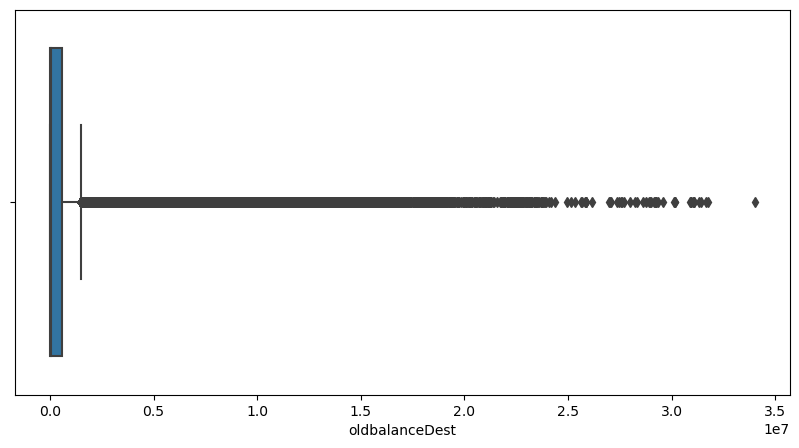

newbalanceDest:


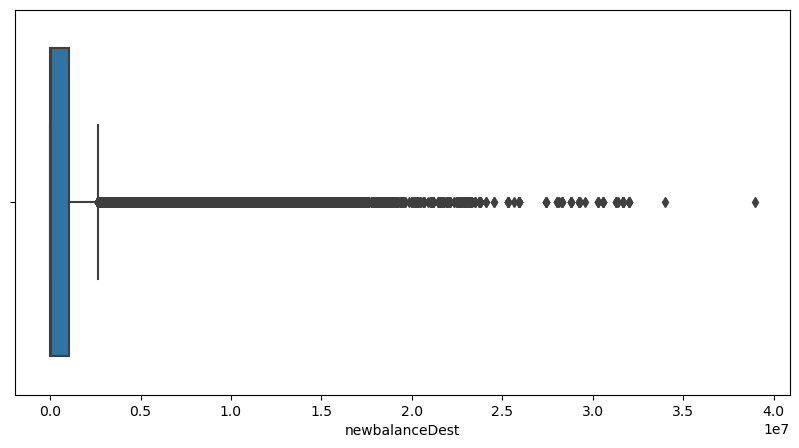

In [13]:
#Numerical values Visulisation wtih box plot

# Numerical values visualization with box plot
for i in num1:
    plt.figure(figsize=(10,5))  # Set the figure size for each box plot
    print(i + ":")
    sns.boxplot(x=i, data=df)   # Create a box plot for the variable `i`
    plt.show()                  # Display the plot


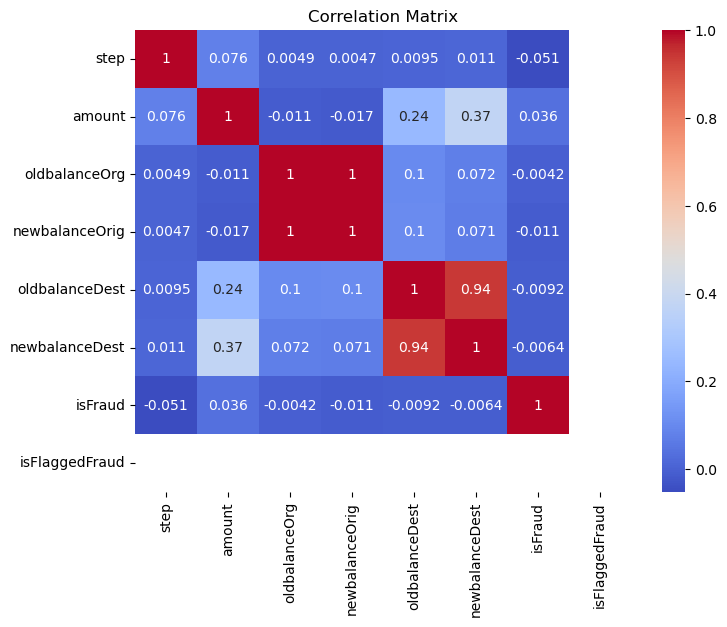

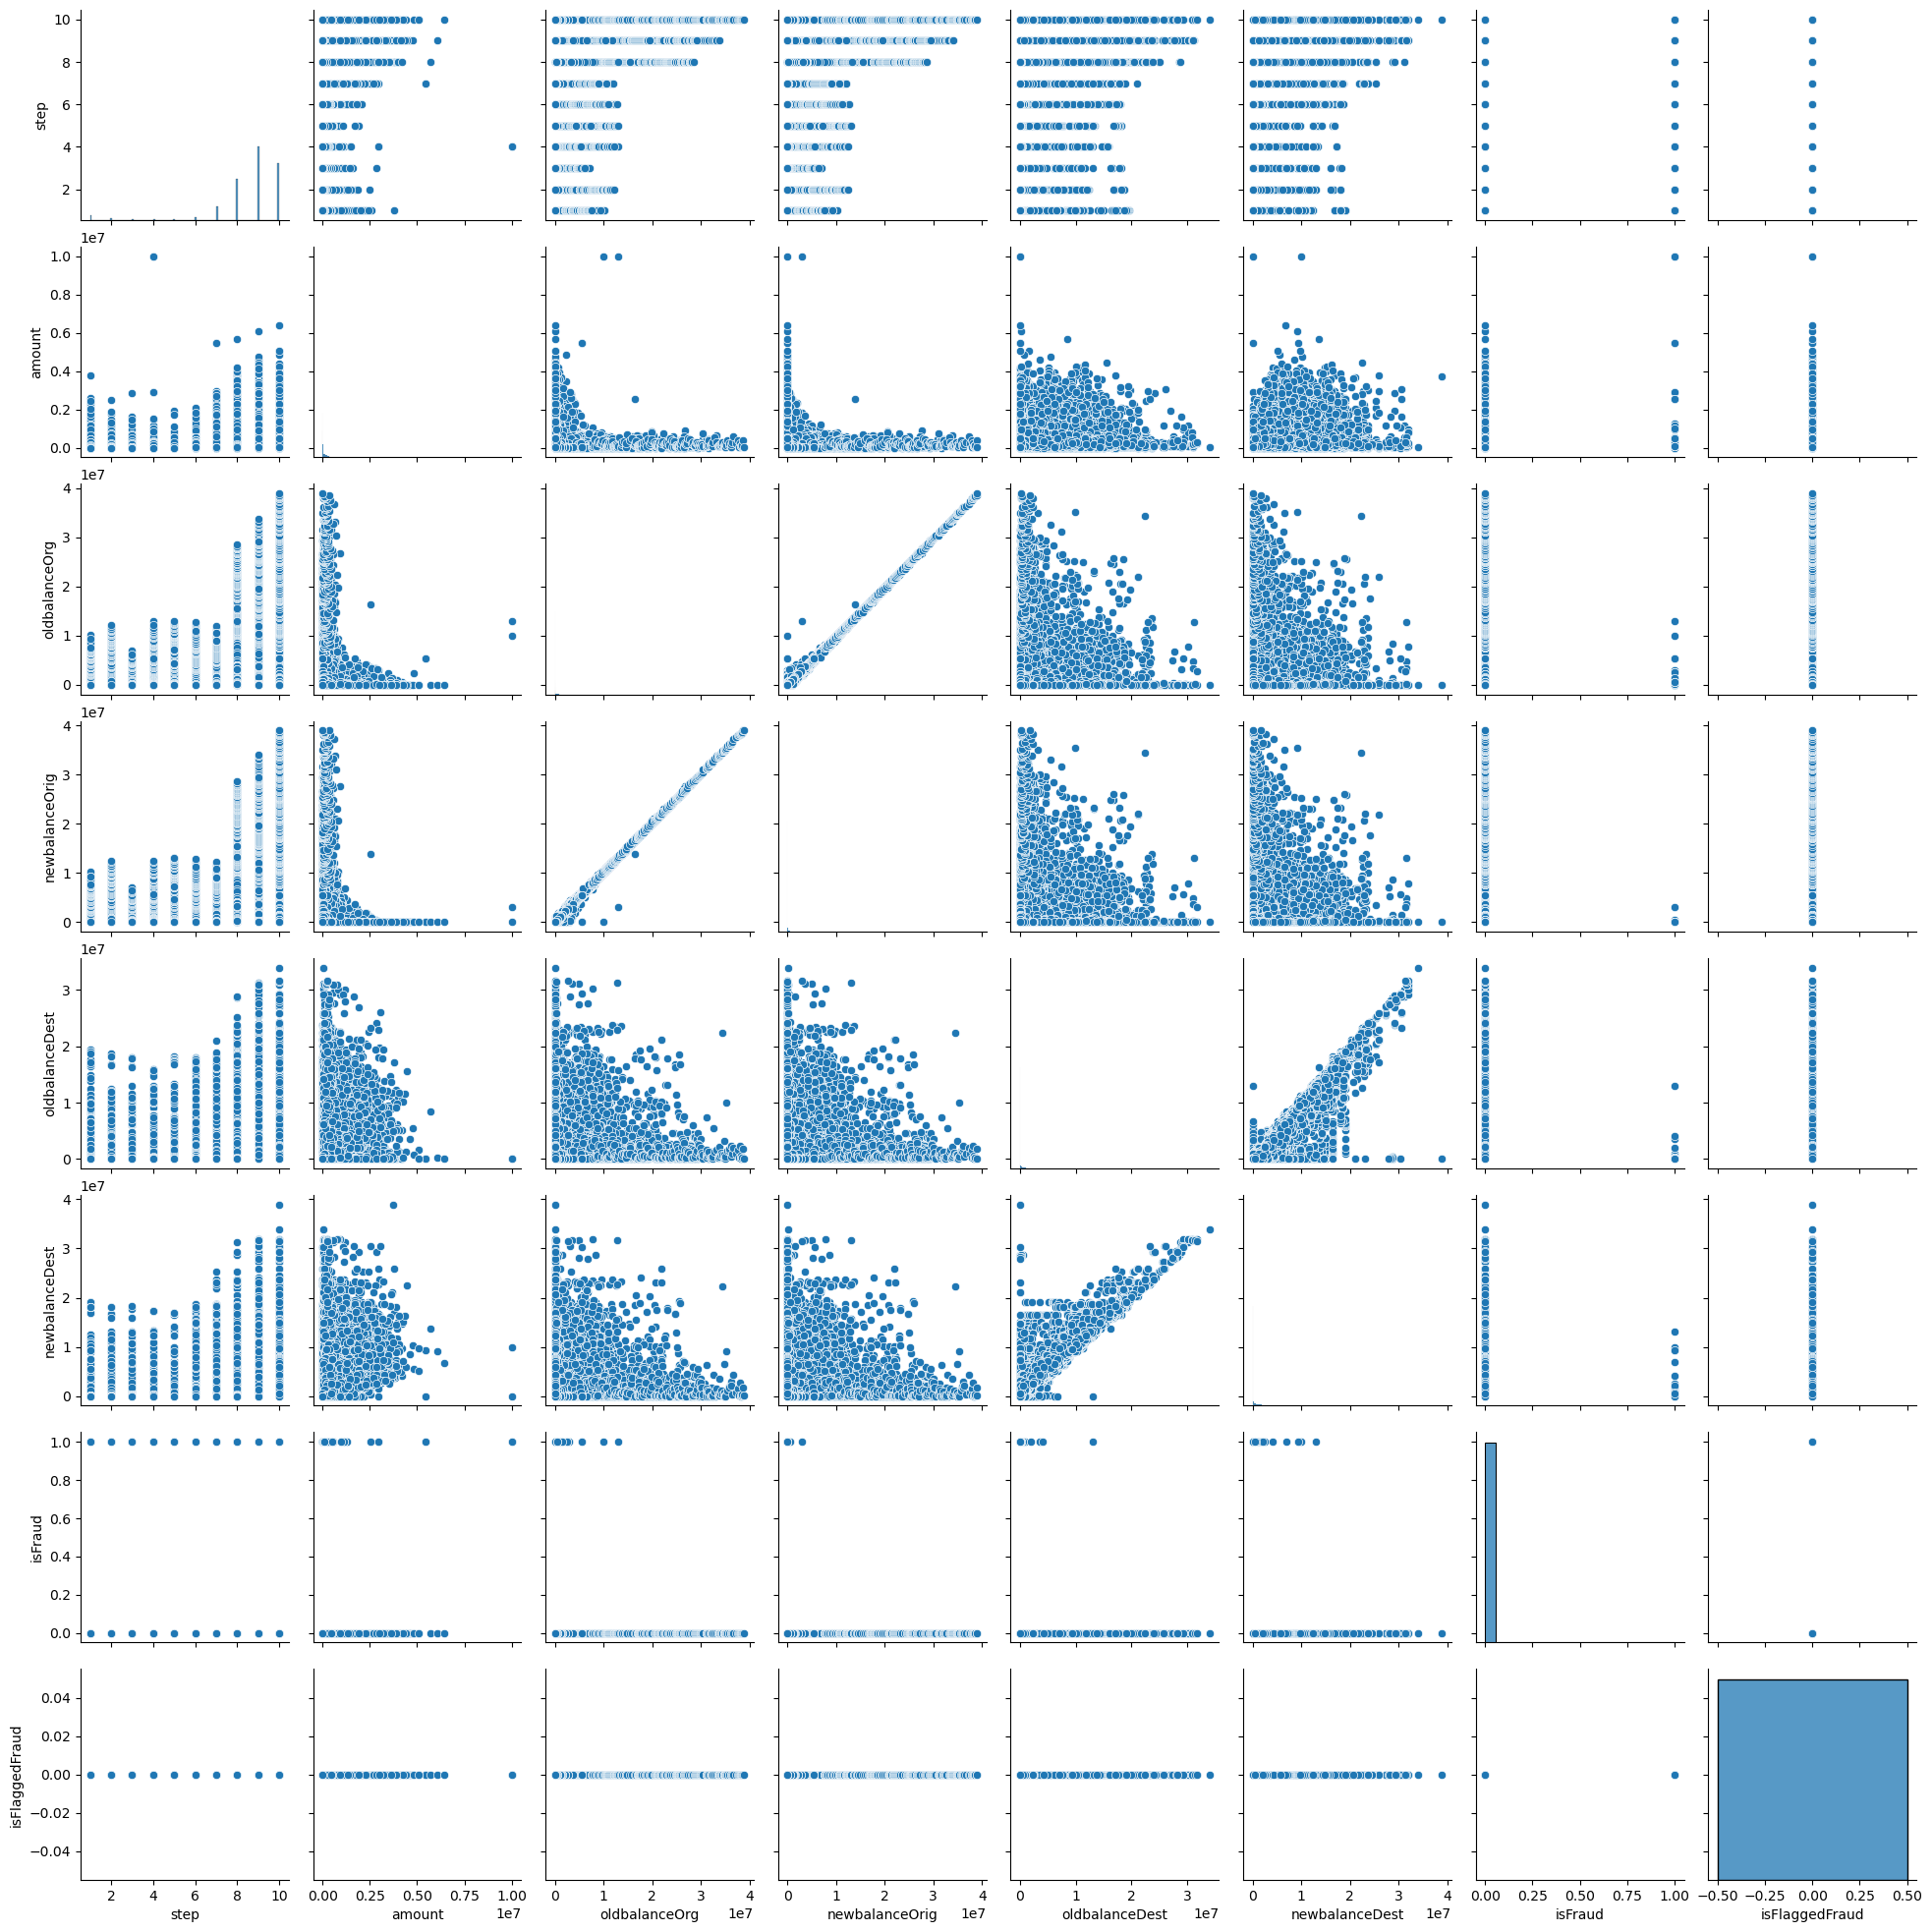

In [14]:
# Correlation Heatmap:
# A heatmap to understand the correlation between numerical features and potentially the isFraud label.
# This will help to see if any feature strongly correlates with the occurrence of fraud.
# Calculate the correlation matrix
correlations = df.corr(numeric_only=True)

# Plotting the correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pairplot to visualize relationships
sns.pairplot(df)
plt.show()

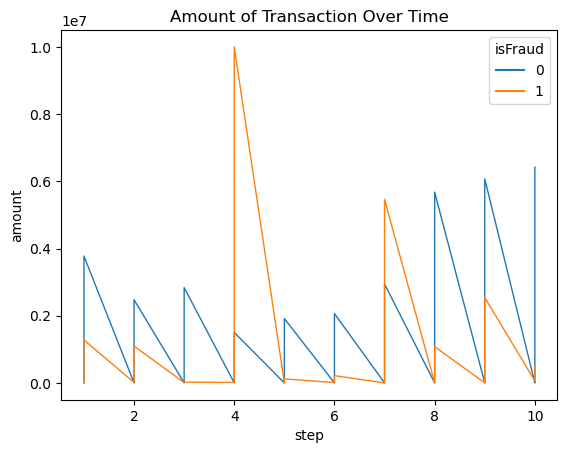

In [15]:
# Time Step Analysis:
# Plot the time step (step) against other features to understand if there's a pattern over time.
# For instance, you could plot a line or bar chart to see if fraud occurrences increase at certain time steps.

sns.lineplot(x='step', y='amount', data=df, hue='isFraud', estimator=None, lw=1)
plt.title('Amount of Transaction Over Time')
plt.show()

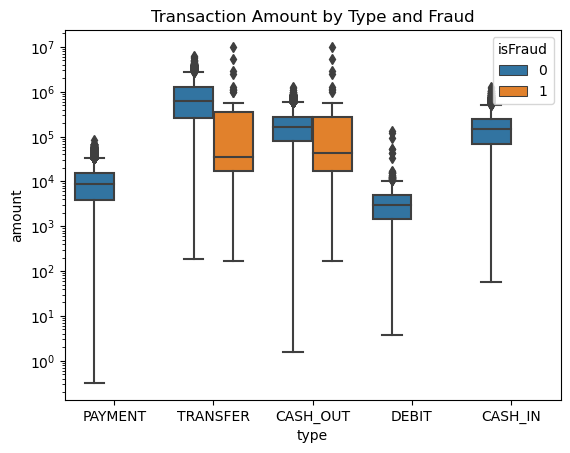

In [16]:
# Boxplots for Transaction Amount by Type:
# Boxplots grouped by transaction type and colored by fraud to see the distribution of amounts across different types of transactions and how they relate to fraud.
sns.boxplot(x='type', y='amount', data=df, hue='isFraud')
plt.title('Transaction Amount by Type and Fraud')
plt.yscale('log')  # Use log scale due to large range of transaction amounts
plt.show()

In [17]:
obj1 = ['type', 'nameOrig', 'nameDest']

In [18]:
# Import the necessary libraries for hypothesis testing
from scipy.stats import chi2_contingency
import stats as stat
import colorama
from colorama import Fore

In [19]:
# Chi-square test to determine whether each categorical variable in a dataset is a good predictor of the target variable isFraud.
for i in obj1:
    print("-"*100)
    a = np.array(pd.crosstab(df['isFraud'], df[i]))         # creates a contigency table beteween each categorical variable and the target vairable
    (stats, p, dof, _) = chi2_contingency(a, correction=False)  # performs the Chi-squar test of independence
    if p >= 0.05:    #at a 95% confidence level
        print(Fore.RED + "{} is Bad predictor\n".format(i))
        print("P_value={:.2f}\n".format(p))
    else:
        print(Fore.GREEN + "{} is Good Predictor\n".format(i))
        print("P_value={:.2f}\n".format(p))

----------------------------------------------------------------------------------------------------
type is Good Predictor

P_value=0.00

----------------------------------------------------------------------------------------------------
nameOrig is Bad predictor

P_value=0.50

----------------------------------------------------------------------------------------------------
nameDest is Bad predictor

P_value=1.00



In [20]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd 
from statsmodels.formula.api import ols
import statsmodels.api as smf

In [21]:
# Anova test for numerical values differ significantly across different catefories of the target variable
for i in num1:
    print("_"*100)
    print(i + ":\n")
    print("Anova:\n")
    formula = '{} ~ isFraud'.format(i)  # dynamically create the formula string
    mod = ols(formula, data=df).fit()    #  fits an Ordinary Least Squares (OLS) regression model based on the formula. The ols function comes from the statsmodels package.
    aov_table = smf.stats.anova_lm(mod, typ=2)   # performs the ANOVA test using the fitted model. The anova_lm function generates an ANOVA table. typ=2 specifies the type of sum of squares to be used in the test.
    print(aov_table, '\n')
    print('p_value={:.2f}\n'.format(aov_table['PR(>F)'][0]))
    p=aov_table['PR(>F)'][0]

    if p>0.05:  #
        print(Fore.RED + "'{}' is 'bad predictor'\n".format(i))
        print('Avg of this feature is same for both loan default and non default group\n')
        print("p_val(p) = {}\n".format(p))
    else:
        print('TUKEY:\n')
        print(Fore.GREEN +"'{}' is a 'good Predictor'\n".format(i))
        print('Avg of this feature is not same for both fraud group and non fraud group\n')
        print('We need to perform Tukey as atleast one category \n')
        print(Fore.GREEN +" '{}' is a 'good Predictor'\n".format(i))
        tukey=pairwise_tukeyhsd(df[i],df.isFraud,alpha=0.05)  # performs the Tukey HSD post-hoc test to determine which specific groups in isFraud are different in terms of the mean of variable i.
        print(tukey,'\n')

____________________________________________________________________________________________________
step:

Anova:

                 sum_sq        df           F        PR(>F)
isFraud      893.298942       1.0  270.195653  1.232291e-60
Residual  335938.042147  101611.0         NaN           NaN 

p_value=0.00

TUKEY:

'step' is a 'good Predictor'

Avg of this feature is not same for both fraud group and non fraud group

We need to perform Tukey as atleast one category 

 'step' is a 'good Predictor'

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1  -2.7766   0.0 -3.1077 -2.4456   True
--------------------------------------------------- 

____________________________________________________________________________________________________
amount:

Anova:

                sum_sq        df           F        PR(>F)
isFraud   1.568344e+13       1.0  131.920453  1.626484e

In [22]:
#Drop the columns based on the hypothesis testing
df1=df.drop(['nameOrig', 'nameDest', 'oldbalanceOrg'],axis=1)

In [23]:
df1.select_dtypes(include='object').columns

Index(['type'], dtype='object')

In [24]:
# Function to replace categorical values with percentages
def replace_with_percentage(column):
    counts = column.value_counts(normalize=True)
    return column.map(counts)*100

In [25]:
for col in df1.select_dtypes(include=['object']).columns:
    df1[col] = replace_with_percentage(df1[col])

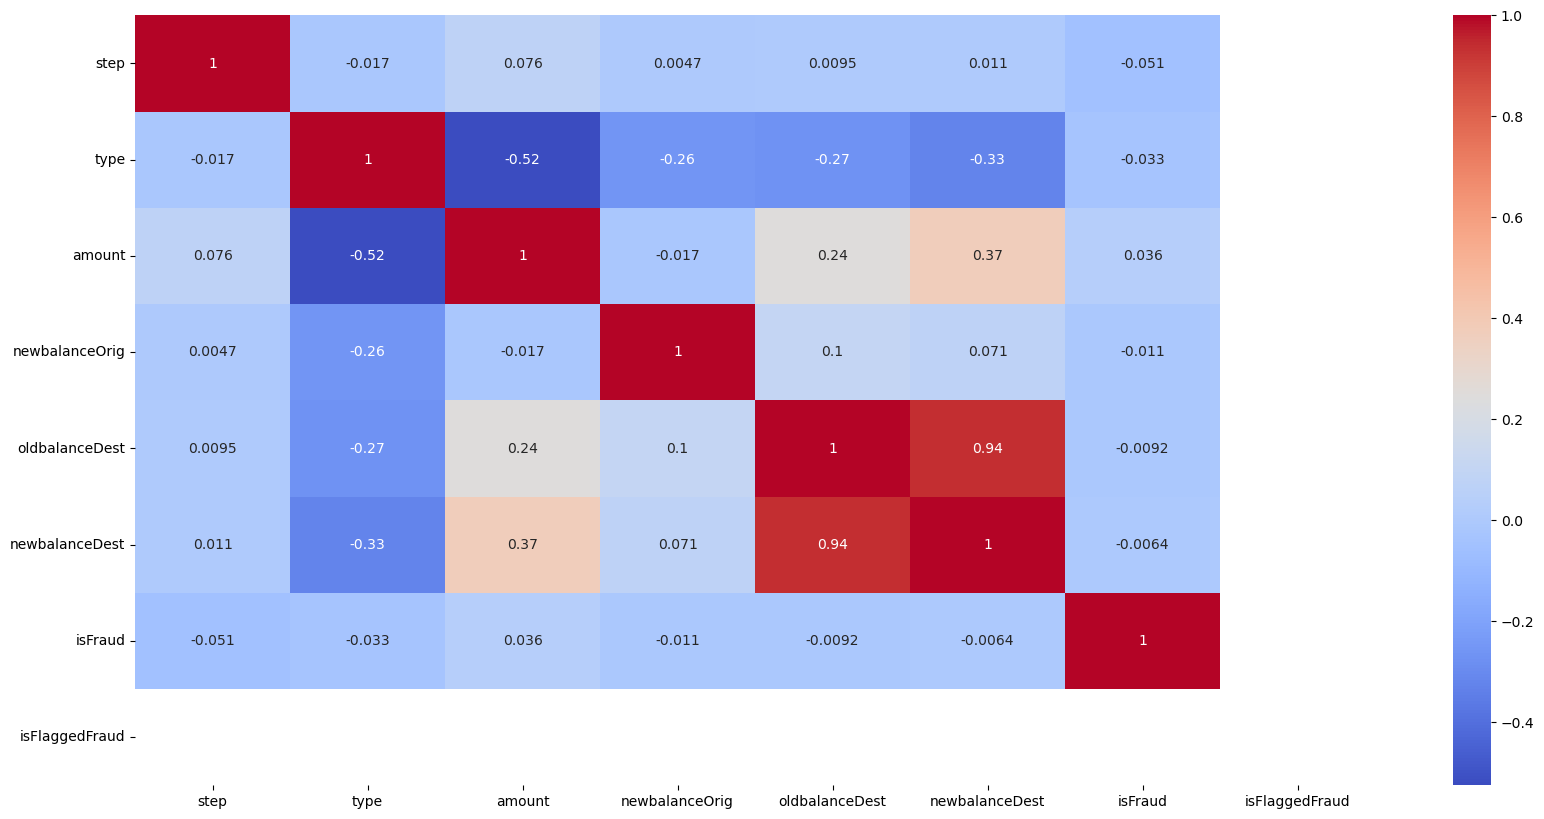

In [26]:
#Correlation matrix after converting the categorical values
plt.figure(figsize=(20,10))
sns.heatmap(data=df1.corr(),cmap='coolwarm',annot=True);

[Back to top](#Index:) 

<a id='part2'></a>

### Part 2 - Optimisation


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
#Split the data for train and test
X=df1.drop('isFraud',axis=1)  # Features
y=df1.isFraud                 #Target variable

In [65]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, chart_title):
    """
    Plots a confusion matrix using seaborn's heatmap.

    Parameters:
    y_true : array-like of shape (n_samples,) - True labels of the data.
    y_pred : array-like of shape (n_samples,) - Predicted labels by the classifier.

    Returns:
    None
    """
    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Create a figure for the plot
    plt.figure(figsize=(7,5))

    # Create a heatmap for the confusion matrix
    sns.heatmap(data=cm, annot=True, cmap="Blues", linewidths=0.5, fmt="d")

    # Label the axes
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")

    # Set the title of the plot
    plt.title(f"{chart_title} Confusion Matrix")

    # Display the plot
    plt.show()

In [29]:
# Split the data into training plus validation and testing sets with stratification
# This ensures that the proportion of classes in both splits will be the same as in the entire dataset

X_train_val,X_test,y_train_val,y_test=train_test_split(X, y,test_size=0.20,stratify=y, random_state=42)

# Next, split the training plus validation dataset into separate training and validation datasets
# Here, I'm using 80-20 split, but you can adjust the size according to your preference
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, stratify=y_train_val, random_state=42)


In [30]:
from sklearn.ensemble import RandomForestClassifier
from skopt import BayesSearchCV
from sklearn.model_selection import GridSearchCV

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

# Import LogisticRegression from sklearn.linear_model

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize the model
log_reg = LogisticRegression(solver='liblinear', random_state=42)  # solver is chosen for compatibility with smaller datasets

# Fit the model
log_reg.fit(X_train, y_train)

# Predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evaluation
print(f'Accuracy of Logistic Regression: {round(accuracy_score(y_test, y_pred_log_reg)*100,2)}%')

print(classification_report(y_test, y_pred_log_reg))

Accuracy of Logistic Regression: 99.89%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20300
           1       0.00      0.00      0.00        23

    accuracy                           1.00     20323
   macro avg       0.50      0.50      0.50     20323
weighted avg       1.00      1.00      1.00     20323



C:\Users\jdche\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jdche\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jdche\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

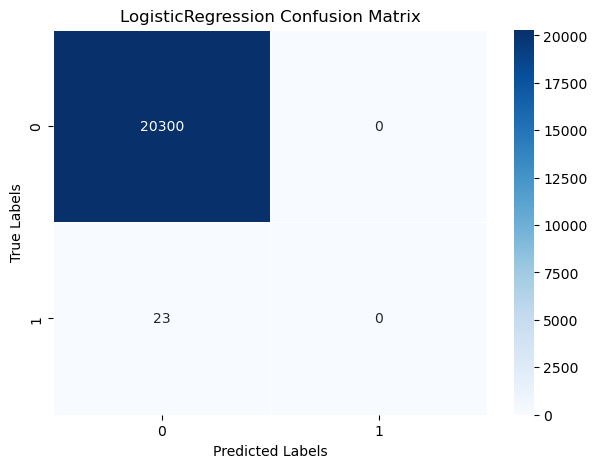

In [67]:
plot_confusion_matrix(y_test, y_pred_log_reg, "LogisticRegression")

# Using BayesSearchCV with RandomForestClassifier

In [32]:
#using BayesSearchCV
param_space = {
    'n_estimators': (10,200),        # Number of trees in the forest
    'max_depth': (1,20),             # Maximum depth of the tree
    'min_samples_split': (2,10),      # Minimun number of samples required to split an internal code
    'min_samples_leaf': (1,10),       # Minimum number of samples required to be at a leaf node
}

bayes_search = BayesSearchCV(
    rfc,
    param_space,          
    n_iter=50,            # Number of optimisation steps
    n_jobs=-1,            # Use all available cores for parallelisation   
    cv=5,                 # Number of cross-validation folds
    random_state=42
)

bayes_search.fit(X_train,y_train)

print("Best hyperparameters:",bayes_search.best_params_)


Best hyperparameters: OrderedDict([('max_depth', 10), ('min_samples_leaf', 1), ('min_samples_split', 5), ('n_estimators', 139)])


In [33]:
rfc1=RandomForestClassifier(max_depth=15,min_samples_leaf=9,min_samples_split=3, n_estimators =46)
rfc1.fit(X_train,y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=9, min_samples_split=3,
                       n_estimators=46)

In [34]:
# Prediction with RandomForestClassifier
y_pred=rfc1.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [36]:
print(f'Model Accuracy score: {round(accuracy_score(y_pred,y_test)*100,2)}%')

Model Accuracy score: 99.9%


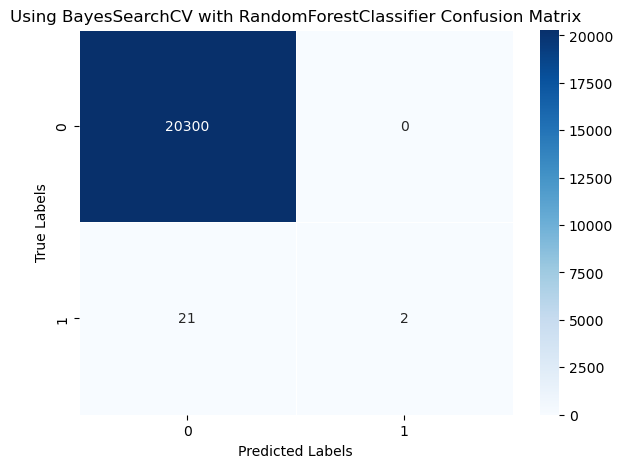

In [68]:
# Plot the confusion matrix to check the true positive and false positive visa versa for Using BayesSearchCV with RandomForestClassifier

plot_confusion_matrix(y_test, y_pred, "Using BayesSearchCV with RandomForestClassifier")


In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20300
           1       1.00      0.09      0.16        23

    accuracy                           1.00     20323
   macro avg       1.00      0.54      0.58     20323
weighted avg       1.00      1.00      1.00     20323



<span style="font-size: 40px; color: blue;"><strong>Using GridSearchCV with RandomForestClassifier</strong></span>



In [37]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt'],
    'random_state': [0, 42]
}

In [38]:
# Fit the RandomForestClassifier with hyperparameters
rfc2 = RandomForestClassifier(max_depth=10, n_estimators=200, random_state=0, max_features='sqrt')
rfc2.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=0)

In [39]:
# Make predictions with the trained model
pr = rfc2.predict(X_test)

# Print the model accuracy
print(f'Model Accuracy score:{round(accuracy_score(pr, y_test) * 100, 2)}%')

Model Accuracy score:99.92%


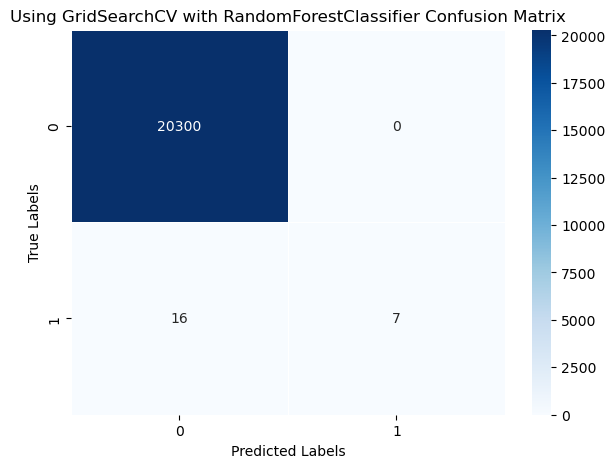

In [69]:
# Plot the confusion matrix to check the true positive and false positive visa versa for Using GridSearchCV with RandomForestClassifier

plot_confusion_matrix(y_test, pr,"Using GridSearchCV with RandomForestClassifier")


In [72]:
print(classification_report(y_test, pr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20300
           1       1.00      0.30      0.47        23

    accuracy                           1.00     20323
   macro avg       1.00      0.65      0.73     20323
weighted avg       1.00      1.00      1.00     20323



# Import DecisionTreeClassifier from sklearn.tree

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
param_grid = {
    "max_depth": [3, 4, 5, 6, 7, 8],
    "min_samples_split": [2, 3, 4],
    "min_samples_leaf": [1, 2, 3, 4],
    "random_state": [0, 42]
}

# Create a DecisionTreeClassifier with 'balanced' class weight
decision_tree = DecisionTreeClassifier(class_weight='balanced')

# Create a GridSearchCV object with the DecisionTreeClassifier
grid_search = GridSearchCV(decision_tree, param_grid, cv=5)

# Fit the GridSearchCV object with training data
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print(grid_search.best_params_)

{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}


In [42]:
# Create a DecisionTreeClassifier with the best parameters found
d_tree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=1, min_samples_split=2, random_state=0)

# Fit the DecisionTreeClassifier with training data
d_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [43]:
# Make predictions with the trained Decision Tree model
pred = d_tree.predict(X_test)

# Print the model accuracy
print(f'Model Accuracy score:{round(accuracy_score(pred, y_test) * 100, 2)}%')

Model Accuracy score:99.89%


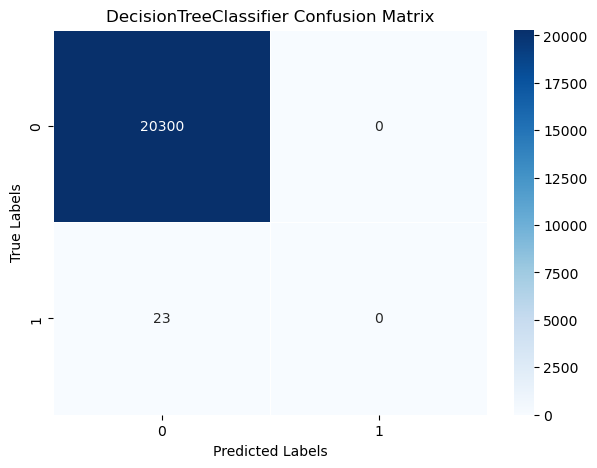

In [70]:
plot_confusion_matrix(y_test, pred,"DecisionTreeClassifier")

In [73]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20300
           1       0.00      0.00      0.00        23

    accuracy                           1.00     20323
   macro avg       0.50      0.50      0.50     20323
weighted avg       1.00      1.00      1.00     20323



C:\Users\jdche\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jdche\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jdche\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

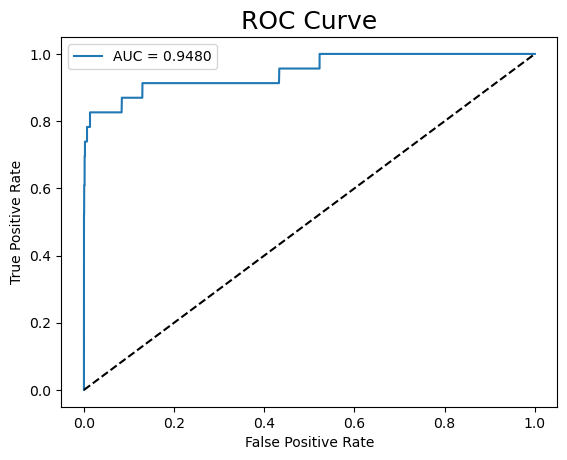

In [45]:
# Lets plot the ROC curve bases on the predicted results for Using GridSearchCV with RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score


# Predict the probabilities for the positive class
y_pred_prob = rfc2.predict_proba(X_test)[:,1]

# Create a dataframe with actual and predicted probabilities
df_actual_predicted = pd.concat([
    pd.DataFrame(np.array(y_test), columns=['y_actual']),
    pd.DataFrame(y_pred_prob, columns=['y_pred_prob'])
], axis=1)

# Set the index of the dataframe to be the same as y_test's index
df_actual_predicted.index = y_test.index

# Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_prob'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_prob'])

# Plot the ROC curve
plt.plot(fpr, tpr, label='AUC = %.4f' % auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='k')  # plot the diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', fontsize=18)
plt.legend()
plt.show()


In [47]:

# Check the features importance using rfc
imp_fea = pd.DataFrame({'Feature_name': X_train.columns, 'importance': rfc2.feature_importances_})
imp_fea = imp_fea.sort_values(by='importance', ascending=False)


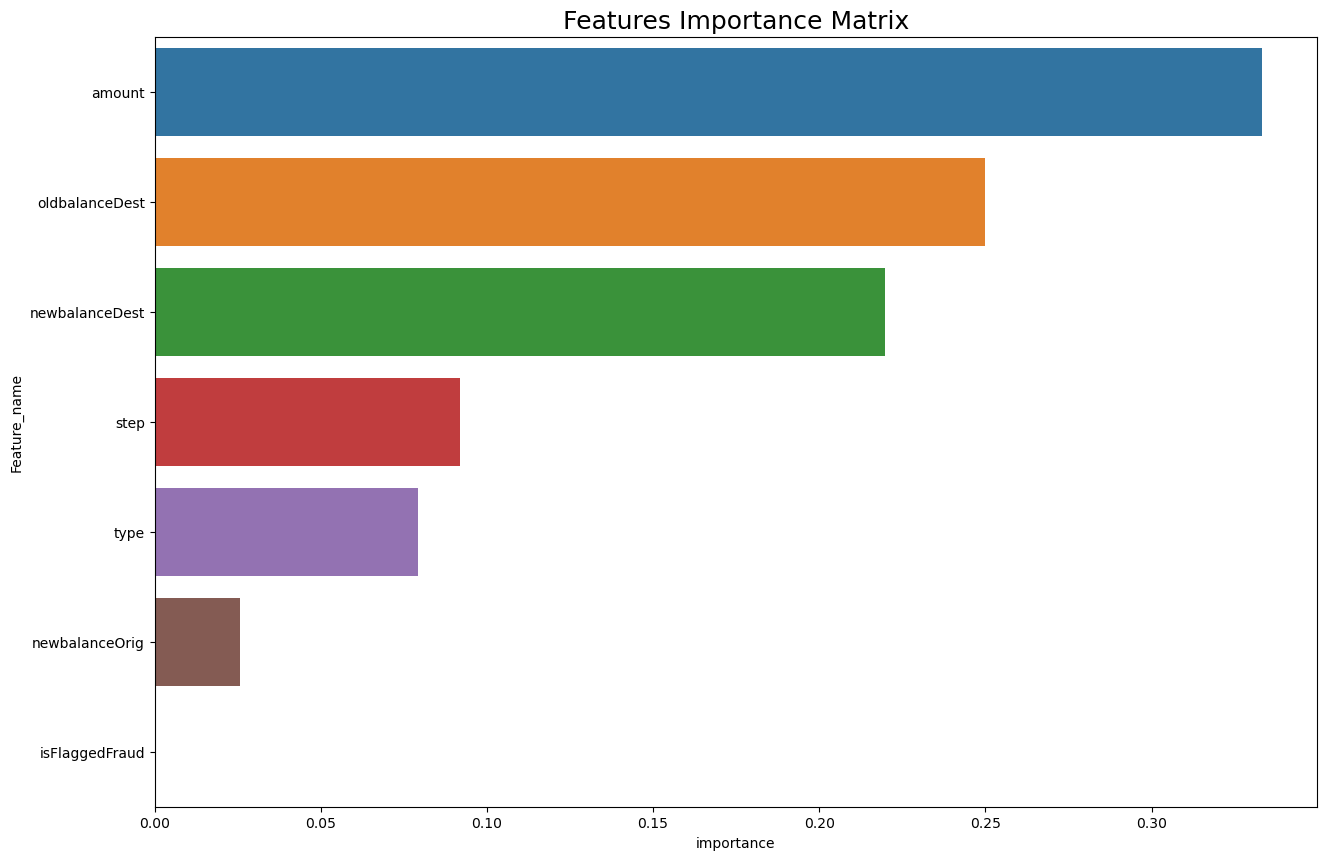

In [48]:
# Plot the features importance matrix
fe1 = imp_fea.head(10)
plt.figure(figsize=(15,10))
sns.barplot(data=fe1, x="importance", y="Feature_name")
plt.title("Features Importance Matrix", fontsize=18)
plt.show()
